<h1 style="color: green;">Summary</h1>

<p>
The following tasks are accomplished in this section:
<ul>
<li>Hyperparameter tuning with GridSearchCV</li>
<li>Final feature selection using selectfrom</li>
<li>Optimization and threshold tuning</li>
<li></li>
<li></li>
</ul>



</p>

<h1 style="color: green;">Import libraries</h1>


In [1]:
import pandas as pd
import numpy as np

import time

import seaborn as sb
import matplotlib.pyplot as plt

# Imblearn for oversampling
from imblearn.over_sampling import SMOTE

# Scaling the values
from sklearn.preprocessing import binarize

# RidgeCV for preliminary feature importance
from sklearn.linear_model import RidgeCV


# GridsearchCV
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic regression
from sklearn.linear_model import LogisticRegression

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

# SVM: svc
from sklearn.svm import SVC

# XGB.classifier
import xgboost as xgb

# feature selection
from sklearn.feature_selection import SelectFromModel

# Metrics Accuracy
from sklearn.metrics import \
accuracy_score, confusion_matrix, recall_score, roc_curve,roc_auc_score

# joblib for storing models
import joblib

# feature importance
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green;">Import data</h1>


In [2]:
X_train = pd.read_csv("../Data/homeshopping_classif_X_train.csv")
X_test = pd.read_csv("../Data/homeshopping_classif_X_test.csv")

In [3]:
X_train.shape, X_test.shape

((621, 81), (267, 81))

In [4]:
# extracting y_train
y_train = X_train.y_train
X_train.drop(['y_train'], axis=1, inplace=True)
y_train.head()


0    1
1    0
2    1
3    0
4    0
Name: y_train, dtype: int64

In [5]:
# Extracting y_test
y_test = X_test.y_test
X_test.drop(['y_test'], axis=1, inplace=True)
y_test.head()

0    0
1    0
2    0
3    1
4    0
Name: y_test, dtype: int64

<h1 style="color: green;">Balancing the data with imblearn.over_sampling SMOTE </h1>

<P>
Binary classification models have a bias towards the majority target attribute.<br> 
This means that if the target distribution favours target = 0 then the model will learn to predict<br>
that attribute better than the target = 1 attribute. This effect is visible in the sensitivity and<br>
specificity of such models.
</P>
<p><b>
    Below resampling is performed using Imblearn oversampling with SMOTE.<br>
    SMOTE employes a nearest neighbour algorithm to generate/interpolate samples.<br>
    This introduces variability around the original data points being sampled such that<br>
    the model doesn't overfit the original data points
</b></p>

In [6]:
resamp = SMOTE(random_state=44)
X_train_resample, y_train_resample = resamp.fit_resample(X_train,y_train)

In [7]:
print(X_train_resample.shape)
X_train_resample.head()

(942, 80)


,Total_Nbr_of_Items,Total_Price,Venue,Payment_Type,Card_Source,Date_diff,Week_day_name,Nbr_items_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,...,Education_wk,Education_wk_perc,Tech_and_services_wk,Cosmetics_and_selfcare_wk,Cosmetics_and_selfcare_exp_receipt,Cosmetics_and_selfcare_exp_wk,Cosmetics_and_selfcare_wk_exp_perc,Clothes_and_shoes_wk,House_and_kitchen_wk,House_and_kitchen_exp_receipt
0,-0.304150,0.108578,-0.228713,0.024481,0.586003,-0.595665,-0.179150,1.431712,1.243970,1.229109,...,0.107108,-0.007061,0.048790,0.344791,0.004288,0.027321,-0.0479,0.075451,0.092007,-0.000415
1,0.711166,0.631123,0.807895,0.024481,-0.065017,0.962480,-0.097813,0.629976,0.407817,1.917409,...,0.107108,-0.007061,-0.006863,0.344791,0.004288,0.027321,-0.0479,0.075451,0.092007,-0.000415
2,-0.304150,0.108578,-0.228713,0.024481,-0.065017,-0.595665,0.389195,0.629976,1.243970,1.229109,...,0.107108,-0.007061,-0.006863,0.344791,0.004288,0.027321,-0.0479,0.075451,0.092007,-0.000415
3,0.711166,-0.266718,0.242304,0.024481,-0.065017,1.618723,-0.179150,0.629976,1.243970,1.229109,...,0.107108,-0.007061,-0.006863,0.344791,0.004288,0.027321,-0.0479,0.075451,0.092007,-0.000415
4,-0.304150,0.108578,-0.228713,0.024481,0.586003,-0.595665,0.121203,0.113680,0.407817,0.293031,...,0.107108,-0.007061,-0.006863,-3.488539,0.004288,0.027321,-0.0479,0.075451,0.092007,-0.000415


In [8]:
print(y_train_resample.shape)
y_train_resample.value_counts()

(942,)


1    471
0    471
Name: y_train, dtype: int64

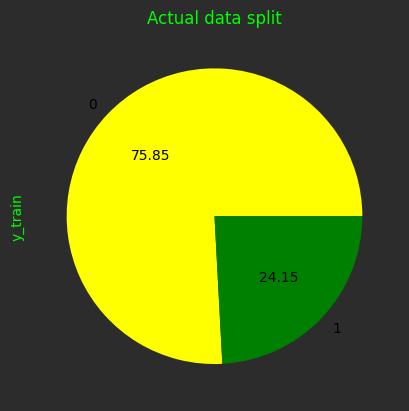

In [9]:
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

ax = y_train.value_counts().plot.pie(autopct='%.2f', colors=['yellow','green'])
_ = ax.set_title("Actual data split")

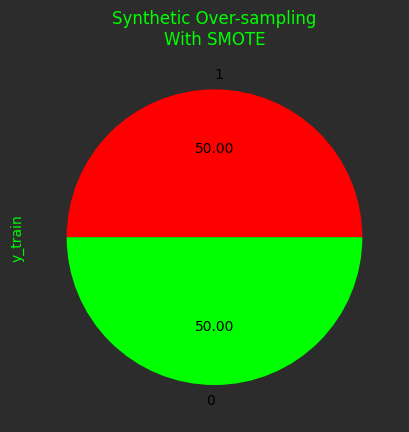

In [10]:
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

ax = y_train_resample.value_counts().plot.pie(autopct='%.2f', colors=['red','lime'])
_ = ax.set_title("Synthetic Over-sampling\nWith SMOTE")

<p>
    As can be seen above, there is now an equal amount of target = 1 and target = 0<br>
    The dataset is now balanced

</p>

<h1 style="color: green;">Model building with GridSearchCV</h1>

In [11]:
keys = ['RandomForestClassifier','LogisticRegression','KNeighborsClassifier','GaussianNB','SVC','XGB'] 

models_list = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'XGB':xgb.XGBClassifier()
}

param_list = {
    'RandomForestClassifier': {
        'n_estimators': np.arange(100,1300,100),
        'random_state': [1]
    },
    
    'LogisticRegression': {
        'penalty' : ['l1','l2','elasticnet'],
        'C': np.logspace(-4,4,20),
        'max_iter' : [10000,50000]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [4,5,6,7,8,9,10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute'],
        'p': [1,2]
    },
    'GaussianNB': {
        'var_smoothing': np.logspace(0,-9, num=100)
    },
    'SVC': {
        'kernel': ['rbf','linear','poly'],
        'gamma': [0.001,0.01,0.1,0.5,1,3,5,10],
        'C': [0.1,1,10,100,1000],
        'degree': [3,4,5,6,7,8]
    },
    'XGB':{
         'max_depth':[4,6,8],
         'min_child_weight':[4,6,8],
         'gamma':[0,1],
         'learning_rate': [0.1,0.05,0.01],
         'n_estimators':[100,300,500]
    }
}

<h3 style="color: green;">GridSearch with imbalanced data</h3>

In [12]:
key_model_params = []
for key in keys:
    string = []
    string.append(key)
    string.append(param_list[key])
    
    start_time =  time.perf_counter()
    gs = GridSearchCV(models_list[key],param_grid=param_list[key],cv=5, verbose=True, n_jobs=-1)
    gs.fit(X_train,y_train)
    end_time = time.perf_counter()
    training_duration = end_time - start_time
    
    string.append(gs.best_params_)
    string.append(gs.best_score_)
    string.append(gs.score(X_test,y_test))
    string.append(training_duration)
    
    key_model_params.append(string)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [13]:
GridSearchOutput = pd.DataFrame(key_model_params, columns =['Model','Param_list_in','best_params',
                                                            'best_score','score_x_y_test',
                                                            'Training_duration_seconds'])
GridSearchOutput.sort_values(by=['score_x_y_test','best_score'], ascending=False)

,Model,Param_list_in,best_params,best_score,score_x_y_test,Training_duration_seconds
5,XGB,"{'max_depth': [4, 6, 8], 'min_child_weight': [...","{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.903484,0.921348,77.781676
0,RandomForestClassifier,"{'n_estimators': [100, 200, 300, 400, 500, 600...","{'n_estimators': 700, 'random_state': 1}",0.897019,0.891386,10.057101
4,SVC,"{'kernel': ['rbf', 'linear', 'poly'], 'gamma':...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...",0.885652,0.883895,177.849810
1,LogisticRegression,"{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [...","{'C': 0.23357214690901212, 'max_iter': 10000, ...",0.887265,0.880150,1.164184
2,KNeighborsClassifier,"{'n_neighbors': [4, 5, 6, 7, 8, 9, 10], 'weigh...","{'algorithm': 'auto', 'n_neighbors': 10, 'p': ...",0.884116,0.868914,0.999190
3,GaussianNB,"{'var_smoothing': [1.0, 0.8111308307896871, 0....",{'var_smoothing': 0.8111308307896871},0.824452,0.853933,0.440188


<h3 style="color: green;">GridSearch with balanced data</h3>

In [14]:
key_model_params = []
for key in keys:
    string = []
    string.append(key)
    string.append(param_list[key])
    
    start_time =  time.perf_counter()
    gs = GridSearchCV(models_list[key],param_grid=param_list[key],cv=5, verbose=True, n_jobs=-1)
    gs.fit(X_train_resample,y_train_resample)
    end_time = time.perf_counter()
    training_duration = end_time - start_time
    
    string.append(gs.best_params_)
    string.append(gs.best_score_)
    string.append(gs.score(X_test,y_test))
    string.append(training_duration)
    
    key_model_params.append(string)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [15]:
GridSearchOutput_balanced = pd.DataFrame(key_model_params, columns =['Model','Param_list_in','best_params',
                                                            'best_score','score_x_y_test',
                                                            'Training_duration_seconds'])
GridSearchOutput_balanced.sort_values(by=['score_x_y_test','best_score'], ascending=False)

,Model,Param_list_in,best_params,best_score,score_x_y_test,Training_duration_seconds
5,XGB,"{'max_depth': [4, 6, 8], 'min_child_weight': [...","{'gamma': 0, 'learning_rate': 0.05, 'max_depth...",0.937515,0.955056,117.438615
0,RandomForestClassifier,"{'n_estimators': [100, 200, 300, 400, 500, 600...","{'n_estimators': 800, 'random_state': 1}",0.942790,0.921348,16.289182
2,KNeighborsClassifier,"{'n_neighbors': [4, 5, 6, 7, 8, 9, 10], 'weigh...","{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",0.946910,0.902622,2.063866
1,LogisticRegression,"{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [...","{'C': 1.623776739188721, 'max_iter': 10000, 'p...",0.906580,0.857678,1.995366
4,SVC,"{'kernel': ['rbf', 'linear', 'poly'], 'gamma':...","{'C': 10, 'degree': 3, 'gamma': 0.5, 'kernel':...",0.965017,0.808989,287.083663
3,GaussianNB,"{'var_smoothing': [1.0, 0.8111308307896871, 0....",{'var_smoothing': 0.01873817422860384},0.851345,0.779026,0.605587


<p>
    The comparison above shows that balancing the data introduces significant improvement in the model
    accuracy.<br>
    <b>In general, this means an improvement in sensitivity</b> i.e. it is usually the case that accuracy is a<br>
    measure of percentage of correct classification. However, with imbalanced data, the model would<br>
    correctly classify the majority group in the label/target and misclassify the minority group.<br>
    Balancing the data increases the correct classification of the minority group.<br>
    <b>This comparison will be done with the confusion matrix and threshold tuning.</b>
</p>

<h1 style="color: green;">Comparing the best models for balanced and imbalanced data</h1>

<h3 style="color: green;">Imbalanced data best model</h3>

In [16]:
# Retrieving the best parameters
GridSearchOutput['best_params'][5]

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 100}

In [17]:
# instantiate the model

xgb_clfier = xgb.XGBClassifier(n_estimators=100, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=4)

# Fitting the model
xgb_clfier.fit(X_train,y_train)

# Checking the accuracy of the model
xgb_clfier.score(X_train,y_train)


0.9710144927536232

In [18]:
# Checking the accuracy of the model
xgb_clfier.score(X_test,y_test)

0.9213483146067416

<h3 style="color: green;">Feature importance for XGB classifier</h3>

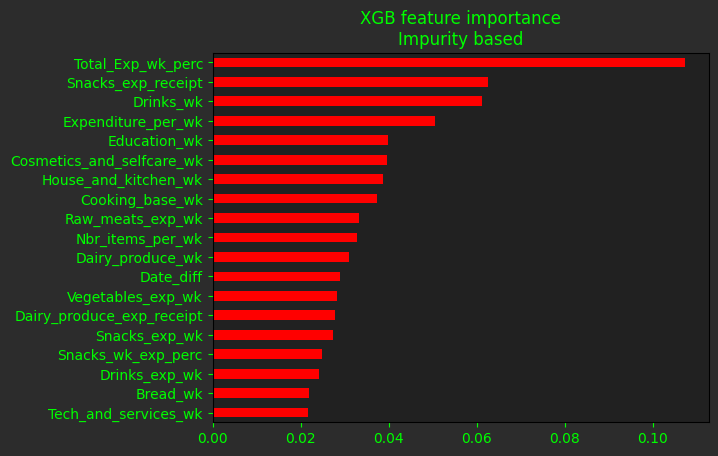

In [19]:
xgb_clfier_imp = pd.Series(xgb_clfier.feature_importances_, 
                    index=X_train.columns)

# plotting importance
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


xgb_clfier_imp.nlargest(19).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='XGB feature importance\nImpurity based')
plt.show()

<h3 style="color: green;">Balanced data best model</h3>

In [20]:
# Retrieving the best parameters
GridSearchOutput_balanced['best_params'][5]

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 4,
 'n_estimators': 500}

In [21]:
# instantiate the model

xgb_clfier_B = xgb.XGBClassifier(n_estimators=500, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=4)

# Fitting the model
xgb_clfier_B.fit(X_train_resample,y_train_resample)

# Checking the accuracy of the model
xgb_clfier_B.score(X_train_resample,y_train_resample)


0.9989384288747346

In [22]:
# Checking the accuracy of the model
xgb_clfier_B.score(X_test,y_test)

0.9550561797752809

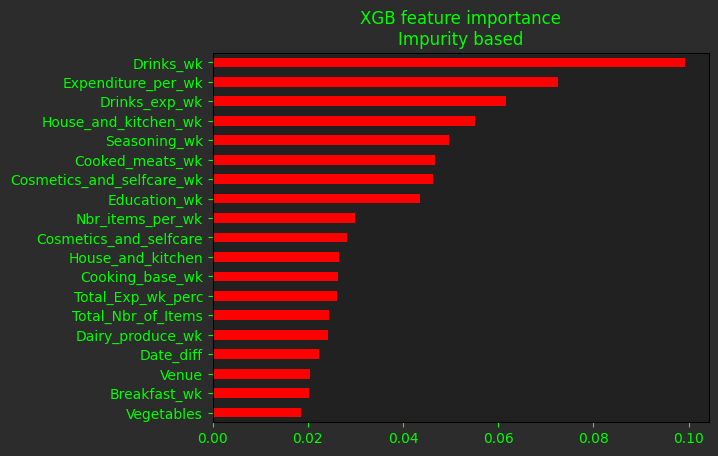

In [23]:
xgb_clfier_imp_B = pd.Series(xgb_clfier_B.feature_importances_, 
                    index=X_train.columns)

# plotting importance
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


xgb_clfier_imp_B.nlargest(19).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='XGB feature importance\nImpurity based')
plt.show()

<h1 style="color: green;">Evaluating the best model (XGBoost)</h1>
<p style="color: red;">
This is done for the purpose of demonstrating knowledge in key areas.<br>
</p>
<p>
    Below a comparison is made between two variations of the XGBoost models:<br>
<ul>
    <li><b>xgb_clfier</b>: model built with imbalanced data</li>
    <li><b>xgb_clfier_B</b>: model built with balanced data</li>
</ul>
Since the objective is to determine whether I will have less than 5 shopping trips in a week,<br>
the aim is to optimize the model for sensitivity i.e. to maximise the correct predictions of<br>
less than 5 shopping trips in a week, true positives, while minimizing false negatives,<br>
the model incorrectly predicts more than four shopping trips a week.<br><br>
The comparison will also illustrate the advantage of using balanced data over imbalanced data.
</p>

<h3 style="color: green;">Retrieving the models</h3>

<p style="color:red;">Model 1: imbalanced data model</p>

In [24]:
xgb_clfier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<p style="color:red;">Model 2: SMOTE balanced data model</p>

In [25]:
xgb_clfier_B

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<h3 style="color: green;">Confusion matrix</h3>

<h1>
$\begin {bmatrix} Sample size=n & Predicted: 0 & Predicted: 1 
\\ Actual: 0 & TN & FP 
\\ Actual: 1 & FN & TP  
\end{bmatrix}$
</h1>

<ul style="color: black;">
<b style="color: green;">Basic terminolgy:</b>
<li><b>True positive(TP): </b> we correctly predicted that they do have the condition</li>
<li><b>True negatives(TN): </b> we correctly predicted that they don't have the condition</li>
<li><b>False positive (FP):</b> we incorrectly predicted that they do have the condition ( a <b>"Type I error"</b>)</li>
<li><b>False negatives (FN):</b> we incorrectly predicted that they don't have the condition (a <b>"Type II error"</b>)</li>
</ul>

<p style="color: red;">Model 1</p>

In [26]:
m1_y_pred = xgb_clfier.predict(X_test)
m1_y_pred.shape

(267,)

In [27]:
y_test.shape

(267,)

In [28]:
m1_confusion_matrix = confusion_matrix(y_test,m1_y_pred)
m1_confusion_matrix

array([[194,   5],
       [ 16,  52]])

<h1>
$\begin {bmatrix} n=267 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 194 & 5 & 199
\\ Actual: 1 & 16 & 52  & 68
\\ Totals: & 210 & 57 & 267
\end{bmatrix}$
</h1>

In [29]:
# unraveling the confusion matrix
m1_tn,m1_fp,m1_fn,m1_tp = confusion_matrix(y_test,m1_y_pred).ravel()

<p style="color: red;">Model 2</p>

In [30]:
m2_y_pred = xgb_clfier_B.predict(X_test)
m2_y_pred.shape

(267,)

In [31]:
y_test.shape

(267,)

In [32]:
m2_confusion_matrix = confusion_matrix(y_test,m2_y_pred)
m2_confusion_matrix

array([[196,   3],
       [  9,  59]])

<h1>
$\begin {bmatrix} n=267 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 196 & 3 & 199
\\ Actual: 1 & 9 & 59  & 68
\\ Totals: & 205 & 62 & 267
\end{bmatrix}$
</h1>

In [33]:
# unraveling the confusion matrix
m2_tn,m2_fp,m2_fn,m2_tp = confusion_matrix(y_test,m2_y_pred).ravel()

<h3 style="color: green;">Sensitivity(recall): when the actual value is positive,how often is the prediction correct</h3>

<p style="color: red;">Model 1</p>

In [34]:
m1_sensitivity = recall_score(y_test,m1_y_pred)
print("Model 1 sensitivity via recall_score: {}".format(m1_sensitivity))

print("Model 1 hand calculated sensitivity: {}".format(m1_tp /(m1_tp + m1_fn)))

Model 1 sensitivity via recall_score: 0.7647058823529411
Model 1 hand calculated sensitivity: 0.7647058823529411


<p style="color: red;">Model 2</p>

In [35]:
    m2_sensitivity = recall_score(y_test,m2_y_pred)
print("Model 2 sensitivity via recall_score: {}".format(m2_sensitivity))

print("Model 2 hand calculated sensitivity: {}".format(m2_tp /(m2_tp + m2_fn)))

Model 2 sensitivity via recall_score: 0.8676470588235294
Model 2 hand calculated sensitivity: 0.8676470588235294


In [36]:
# Calculating the percentage difference in sensitivity between the models
(0.8676470588235294 - 0.7647058823529411)/0.7647058823529411

0.13461538461538472

<p>
It can be seen above that the balanced data has 13% improvement in sensitivity:<br>
This means that the second model is more accurate when it comes to correctly<br>
predicting less than 5 shopping trips per week
</p>

<h3 style="color: green;">Specificity: When the actual value is negative, how often is the prediction correct</h3>

<p style="color: red;">Model 1</p>

In [37]:
m1_Specificity = m1_tn/(m1_tn + m1_fp)
print("Model 1 specificity: {}".format(m1_Specificity))

Model 1 specificity: 0.9748743718592965


<p style="color: red;">Model 2</p>

In [38]:
m2_Specificity = m2_tn/(m2_tn + m2_fp)
print("Model 2 specificity: {}".format(m2_Specificity))

Model 2 specificity: 0.9849246231155779


<p>
There is negligible difference between the two models with respect to specificity.<br>
However, model 2 has a near perfect score of 98%: demonstrating the superiority of oversampling.<br><br>

Both the models have higher specificity than sensitivity. This means the models predicts negative<br>
instances better than it does positive instances i.e. the model is better at telling when<br>
I'm going to have more than 4 shopping trips in a week than when I'm going to have 4 <br>
or less shopping trips in a week.
</p>

<h3 style="color: green;">Precision: when a positive value is predicted, how often is the prediction correct</h3>

<p style="color: red;">Model 1</p>

In [39]:
m1_precision = m1_tp / (m1_tp + m1_fp)
print("Model 1 precision: {}".format(m1_precision))

Model 1 precision: 0.9122807017543859


<p style="color: red;">Model 2</p>

In [40]:
m2_precision = m2_tp / (m2_tp + m2_fp)
print("Model 2 precision: {}".format(m2_precision))

Model 2 precision: 0.9516129032258065


In [41]:
# calculating the precision percentage difference between model 1 and model 2
(0.9516129032258065 - 0.9122807017543859)/0.9122807017543859

0.043114143920595635

In [42]:
m1_confusion_matrix

array([[194,   5],
       [ 16,  52]])

In [43]:
m2_confusion_matrix

array([[196,   3],
       [  9,  59]])

<p style="color: black;">
It must be noted that the models have very high precision: the proportion of the true<br> 
positive rates are higher than false positive rates for both models. However, model 2 has a<br>
4% lead with respect to precision.<br> 
Thus atleast 91% of the time when the models say I'm going to have 4 or less shopping trips per week, it's often right.
</p>

<p>
<b>The performance improvement of balancing the data is evident.</b> Thus final model feature selection and threshold tuning will be done with the balanced data model.
</p>

<h1 style="color: green;">Final model feature selection</h1>

In [44]:
# shape of X_train_resample before final feature selection
X_train_resample.shape

(942, 80)

In [45]:
# select features using the impotance derived from XGBoost
sel_ = SelectFromModel(xgb.XGBClassifier(n_estimators=500, 
                                         gamma=0, 
                                         learning_rate=0.05, 
                                         max_depth=8, 
                                         min_child_weight=4))

sel_.fit(X_train_resample, y_train_resample)

# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_xgb = pd.DataFrame(sel_.transform(X_train_resample))
X_test_xgb = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_xgb.columns = X_train_resample.columns[(sel_.get_support())]
X_test_xgb.columns = X_test.columns[(sel_.get_support())]

In [46]:
# Shape of X_train_resample/X_train_xgb after final feature selection
# As can be seen the number of features has been reduced to 28
X_train_xgb.shape

(942, 28)

In [47]:
# features remaining in the model
X_train_xgb.columns

Index(['Total_Nbr_of_Items', 'Venue', 'Date_diff', 'Nbr_items_per_wk',
       'Expenditure_per_wk', 'Total_Exp_wk_perc', 'Drinks', 'Vegetables',
       'Cosmetics_and_selfcare', 'House_and_kitchen', 'Bread_wk',
       'Cooked_meats_wk', 'Raw_meats_wk', 'Snacks_wk', 'Snacks_exp_receipt',
       'Snacks_exp_wk', 'Drinks_wk', 'Drinks_exp_wk', 'Vegetables_exp_wk',
       'Fruit_wk', 'Cooking_base_wk', 'Dairy_produce_wk', 'Seasoning_wk',
       'Breakfast_wk', 'Education_wk', 'Cosmetics_and_selfcare_wk',
       'Cosmetics_and_selfcare_wk_exp_perc', 'House_and_kitchen_wk'],
      dtype='object')

In [48]:
# Re-running the model with the final features
# instantiate the model

xgb_clfier_final_features = xgb.XGBClassifier(n_estimators=500, 
                                             gamma=0, 
                                             learning_rate=0.05, 
                                             max_depth=8, 
                                             min_child_weight=4)

# Fitting the model
xgb_clfier_final_features.fit(X_train_xgb,y_train_resample)

# Checking the accuracy of the model
xgb_clfier_final_features.score(X_train_xgb,y_train_resample)


0.994692144373673

In [49]:
xgb_clfier_final_features.score(X_test_xgb,y_test)

0.9625468164794008

<p>
Both the training and test scores are much higher than previous run with the balanced data.<br>
Which means the removal of some features has resulted in a much better model.
</p>

<h3 style="color: green;">Final model feature selection importance</h3>

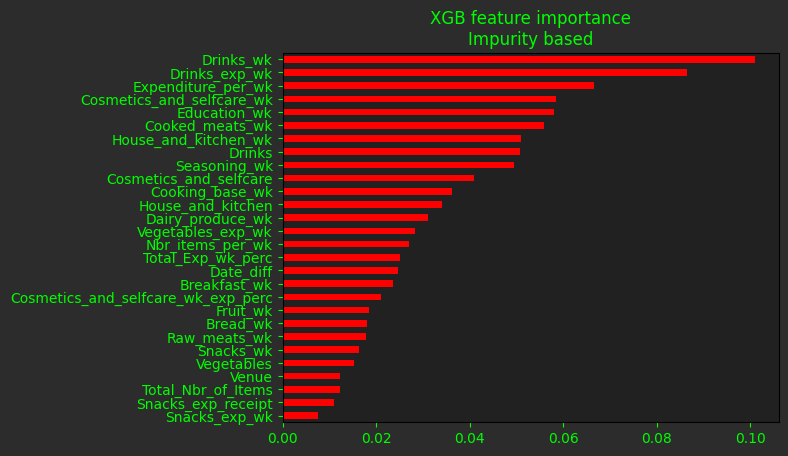

In [50]:
xgb_clfier_final_features_imp = pd.Series(xgb_clfier_final_features.feature_importances_, 
                    index=X_train_xgb.columns)

# plotting importance
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


xgb_clfier_final_features_imp.nlargest(31).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='XGB feature importance\nImpurity based')
plt.show()

<h1 style="color: green;">Evaluating the final model (XGBoost with balanced data)</h1>

In [51]:
final_y_pred = xgb_clfier_final_features.predict(X_test_xgb)
final_y_pred.shape

(267,)

In [52]:
y_test.shape

(267,)

In [65]:
final_confusion_matrix = confusion_matrix(y_test,final_y_pred)
final_confusion_matrix

array([[196,   3],
       [  7,  61]])

In [54]:
# comparison with the previous balanced data model with 80 features
m2_confusion_matrix

array([[196,   3],
       [  9,  59]])

<p>
As can be seen, 2 units have been shifted from false negatives to true positives, the false positives and<br>
true negatives have remained the same. This indicates an improvement in precision.
</p>

<h1>
$\begin {bmatrix} n=267 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 196 & 3 & 199
\\ Actual: 1 & 7 & 61  & 68
\\ Totals: & 203 & 64 & 267
\end{bmatrix}$
</h1>

In [55]:
# unraveling the confusion matrix
final_tn,final_fp,final_fn,final_tp = confusion_matrix(y_test,final_y_pred).ravel()

<h3 style="color: green;">Sensitivity(recall): when the actual value is positive,how often is the prediction correct</h3>

In [56]:
final_sensitivity = recall_score(y_test,final_y_pred)
print("Model 1 sensitivity via recall_score: {}".format(final_sensitivity))

Model 1 sensitivity via recall_score: 0.8970588235294118


In [57]:
# previous sensitivity for balanced data model
m2_sensitivity

0.8676470588235294

In [58]:
# Sensitivity percentage improvement comparison between previous model and final selection
(final_sensitivity - m2_sensitivity)/m2_sensitivity
# There is a 3% improvement in sensitivity from performing feature selection

0.03389830508474577

<h3 style="color: green;">Specificity: When the actual value is negative, how often is the prediction correct</h3>

In [59]:
final_Specificity = final_tn/(final_tn + final_fp)
print("Model 1 specificity: {}".format(final_Specificity))

Model 1 specificity: 0.9849246231155779


In [60]:
# Previous specificity for balanced data model
m2_Specificity

0.9849246231155779

In [61]:
# specificity percentage improvement comparison between previous model and final selection
(final_Specificity - m2_Specificity)/m2_Specificity
# There is no change in specificity between the previous model and the final feature selection

0.0

<h3 style="color: green;">Precision: when a positive value is predicted, how often is the prediction correct</h3>

In [62]:
final_precision = final_tp / (final_tp + final_fp)
print("Final model precision: {}".format(final_precision))

Final model precision: 0.953125


In [63]:
m2_precision

0.9516129032258065

In [64]:
# Precision percentage improvement comparison between previous model and final selection
(final_precision - m2_precision)/m2_precision
# There is negligible improvement in precision.

0.0015889830508474124

<h3 style="color: green;">Predicted probabilities</h3>

<p style="color: red;">Balanced data model predicted probabilities </p>

In [93]:
m2_pred_prob = xgb_clfier_B.predict_proba(X_test)[:,1]

print("Average probability for balanced data: {}".format(m2_pred_prob.mean()))


Average probability for balanced data: 0.24335362017154694


<p style="color: red;">Final features model predicted probabilities </p>

In [94]:
final_pred_prob = xgb_clfier_final_features.predict_proba(X_test_xgb)[:,1]
print("Average proabability for final features: {}".format(final_pred_prob.mean()))


Average proabability for final features: 0.24371080100536346


<p>
The final feature model has a slight higher average probability.<br>
This means that for some instances the final features model is allocating higher probabilities.
</p>

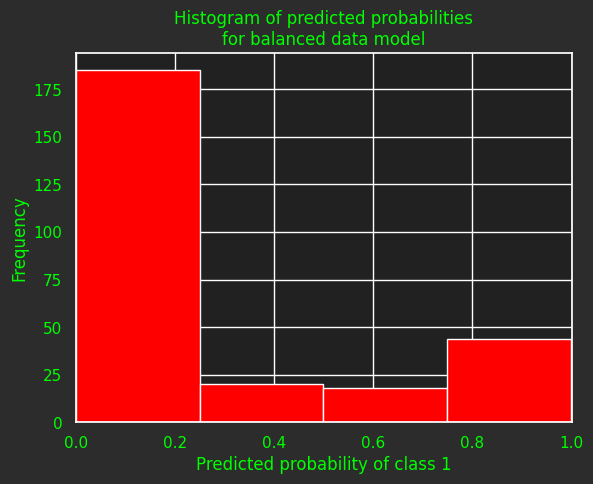

In [83]:
sb.set_style('dark')
# sb.set_palette(theme,2)
sb.set(rc={'axes.facecolor':'#424242',
           'figure.facecolor':'#212121',
           'axes.labelcolor':'lime',
           'text.color':'lime'})

# histogram of predicted probabilities
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

plt.xlim(0,1)
plt.title("Histogram of predicted probabilities\nfor balanced data model")
plt.xlabel("Predicted probability of class 1")
plt.ylabel("Frequency")

plt.hist(m2_pred_prob, bins=4, color='red')
plt.show()

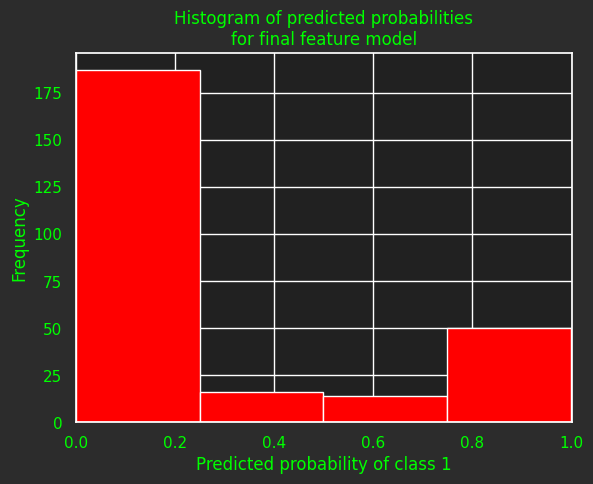

In [84]:
# histogram of predicted probabilities
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

plt.xlim(0,1)
plt.title("Histogram of predicted probabilities\nfor final feature model")
plt.xlabel("Predicted probability of class 1")
plt.ylabel("Frequency")

plt.hist(final_pred_prob, bins=4, color='red')
plt.show()

<p>
The histograms show that the majority of instances have a lower probability of being in the target=1<br>
group, the first bin.<br><br>
While a smaller subset of instances have higher probabilities, probabilities greater than 0.5, the default cut off. <br>
When comparing the two models, they have the same performance in the first bin, however they differ in the<br>
second, third and fourth bin: the final feature model is allocating higher probabilities to instances;<br>
<b>the fourth bin of the balanced data model has less than 50 instances while the final feature model has 50 frequencies.<br>It's assumed these frequencies are pulled up from the second and third bins.</b>
</p>


<h1 style="color: green;">Sensitivity threshold tuning</h1>

In [95]:
m2_confusion_matrix

array([[196,   3],
       [  9,  59]])

In [96]:
final_confusion_matrix

array([[196,   3],
       [  7,  61]])

<p style="color: black;">
I'm more concerned about lowering the number of shopping trips I do in a week.<br>
So I want to increase the sensitivity of the model by shifting the 7 instances in the bottom left corner<br>
of final features model to the right. This can be done by adjusting the probability threshold.<br><br>

<b>Note, these levels of sensitivity are excellent and acceptable, so the following is done mainly to<br> demonstrate knowledge in key areas rather than a neccessity born out of bad models.</b>
</p>

<p>The superiority of the final feature selection model has been adequately illustrated.<br>
The threshold tuning will be done only on the final feature model
</p>

<p>
From the histograms above, it would be sensible to designate 0.2 as the threshold for target=1 classification<br>
i.e. a probability greater than 0.2 means less than 5 shopping trips in a week.<br>
This is because looking at the distributions, there aren't that many instances to the right of 0.2 so <br>
it makes sense to group them.
</p>

In [119]:
# Threshold tuning
# after a few trials it seems 0.33 is the optimal threshold
# beyond this threshold there is higher compensation for false positives for
# no gain in true positives i.e. its difficult to shift the last unit
final_pred_class_binarize = binarize([final_pred_prob],threshold=0.33)[0]

In [120]:
# Original final_confusion_matrix confusion matrix
final_confusion_matrix

array([[196,   3],
       [  7,  61]])

In [121]:
# new confusion matrix after threshold tuning
final_binarize_confusion_matrix = confusion_matrix(y_test,final_pred_class_binarize)
final_binarize_confusion_matrix

array([[191,   8],
       [  1,  67]])

<p style="color: black;">
As can be seen above, we have shifted 6 units which were false negatives into true <br>
positives using <b>threshold=0.33</b>.<br>
Further reduction of threshold in attempt to shift the last unit across has a higher cost<br>
with respect to specificity i.e. it causes a higher increase in false negative rates i.e.<br>
situations where the actual instance is number of shopping trips greater than 4 but the<br>
prediction states that it is less than 4 shopping trips.
</p>

In [122]:
# unraveling the new confusion matrix
final_Binarize_tn,final_Binarize_fp,final_Binarize_fn,final_Binarize_tp = \
confusion_matrix(y_test,final_pred_class_binarize).ravel()

In [123]:
# Sensitivity
final_sensitivity_binarize = recall_score(y_test,final_pred_class_binarize)

print("Original final feature sensitivity: {0}".format(final_sensitivity))
print("Threshold final features sensitivity: {0}".format(final_sensitivity_binarize))

Original final_sensitivity sensitivity: 0.8970588235294118
Threshold final_sensitivity sensitivity: 0.9852941176470589


In [125]:
(final_sensitivity_binarize - final_sensitivity)/final_sensitivity

0.09836065573770493

In [124]:
# Specificity
final_binarize_specificity = final_Binarize_tn/(final_Binarize_tn + final_Binarize_fp)

print("Original final features specificity: {0}".format(final_Specificity))
print("Threshold tuned model 1 specificity: {}".format(final_binarize_specificity))

Original final features specificity: 0.9849246231155779
Threshold tuned model 1 specificity: 0.9597989949748744


In [126]:
(final_binarize_specificity - final_Specificity)/final_Specificity

-0.02551020408163265

<p style="color: black;">
As can be seen above, threshold tuning has made a signigicant improvement in sensitivity,<br>
approximately 10% increase with a minimal cost in specificity of approximately -3%.
</p>

<h3 style="color: green;">Receiver operating Characteristic Curve (ROC Curves) and Area Under the Curve (AUC)</h3>

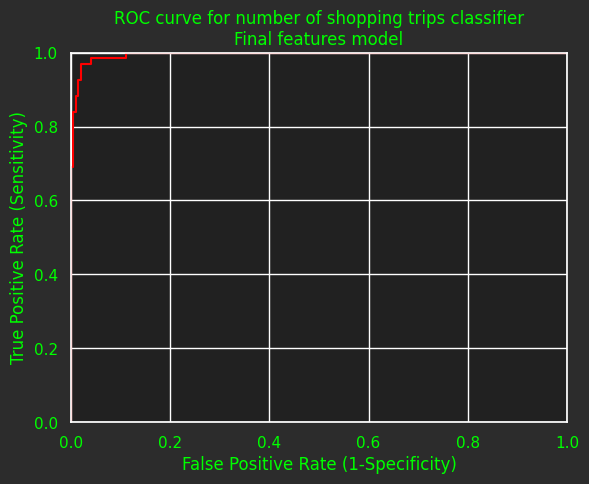

In [128]:
# retrieving false positive rate, true positive rates and thresholds in preparation for ROC curve
final_fpr, final_tpr, final_thresholds = roc_curve(y_test, final_pred_prob)

# graph false positive rate (fpr) vs true positive rate (tpr)
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

plt.plot(final_fpr, final_tpr, color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for number of shopping trips classifier\nFinal features model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

<h3 style="color: green;">Area Under the Curve (AUC)</h3>

In [129]:
# AUC(Area under the curve) model 1
roc_auc_score(y_test, final_pred_prob)

0.9950487732781556

<h3 style="color: green;">Selecting Sensitivity and Specificity from ROC using a function</h3>

In [130]:
# define a function that accepts a threshold and prints sensitivity and specificity
def final_evaluate_threshold(threshold):
    print("Sensitivity: ",final_tpr[final_thresholds > threshold][-1])
    print("Specificity: {}".format(1 -final_fpr[final_thresholds > threshold][-1]))

In [144]:
final_evaluate_threshold(0.33)

Sensitivity:  0.9852941176470589
Specificity: 0.9597989949748744


<p style="color: black;"><b>
The function above is very useful, infact it should be the first point of call<br>
for threshold tuning.
</b></p>

<h3 style="color: green;">Sensitivity vs Specificity threshold ranges for final features model</h3>
<p>
    The function above is extended to review various threshold ranges, below,<br>
    to visualise the optimisation of sensitivity vs specificity
</p>

In [140]:
def final_evaluate_threshold_range(threshold):
    threshold_range = []
    for x in threshold:
        string = []
        string.append(x)
        tpr_threshold = final_tpr[final_thresholds > x][-1]
        string.append(tpr_threshold)
        fpr_threshold = 1 -final_fpr[final_thresholds > x][-1]
        string.append(fpr_threshold)
        threshold_range.append(string)
    
    return threshold_range

In [151]:
final_range = [0.05, 0.1,0.11, 0.12,0.13,0.14,0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

final_range_of_thresholds = final_evaluate_threshold_range(final_range)


In [152]:
final_thresholds_data = pd.DataFrame(final_range_of_thresholds, columns=['Threshold','Sensitivity','Specificity'])
final_thresholds_data

,Threshold,Sensitivity,Specificity
0,0.05,1.000000,0.869347
1,0.10,1.000000,0.869347
2,0.11,1.000000,0.869347
3,0.12,1.000000,0.869347
4,0.13,1.000000,0.879397
5,0.14,1.000000,0.889447
6,0.15,0.985294,0.889447
7,0.20,0.985294,0.959799
8,0.25,0.985294,0.959799
9,0.30,0.985294,0.959799


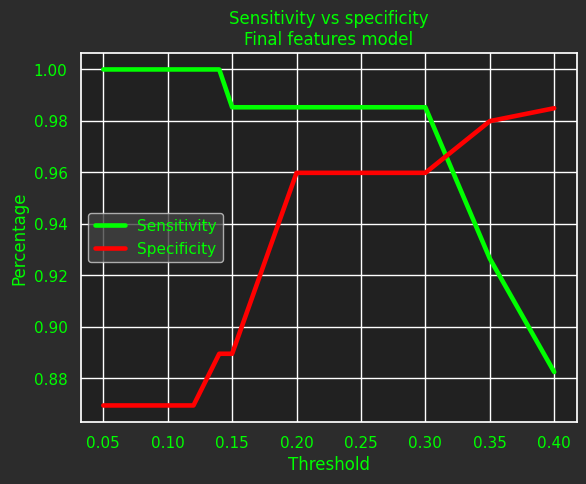

In [153]:
# Plotting sensitivity vs specificity

# graph false positive rate (fpr) vs true positive rate (tpr)
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

plt.plot(final_thresholds_data.Threshold, final_thresholds_data.Sensitivity, 
         color='lime',lw=3.3, label='Sensitivity')
plt.plot(final_thresholds_data.Threshold, final_thresholds_data.Specificity, 
         color='red',lw=3.3, label='Specificity')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.title('Sensitivity vs specificity\nFinal features model')
plt.xlabel('Threshold')
plt.ylabel('Percentage')
ax.legend()
plt.grid(True)
plt.show()

<p>
The graph illustrates the sensitivity and specificity levels for a given threshold value.
</p>

<h1 style="color: green;">Threshold tuning choice</h1>

<p>
Let's consider the extreme case where all the true positives are captured at the expense of increasing false positives.
</p>

In [146]:
final_evaluate_threshold(0.14)

Sensitivity:  1.0
Specificity: 0.8894472361809045


In [148]:
# Threshold tuning
# after a few trials it seems 0.14 is the optimal threshold for model 1
final_pred_class_binarize = binarize([final_pred_prob],threshold=0.14)[0]

In [149]:
# Original final_confusion_matrix confusion matrix
final_confusion_matrix

array([[196,   3],
       [  7,  61]])

In [150]:
# new confusion matrix after threshold tuning
final_binarize_confusion_matrix = confusion_matrix(y_test,final_pred_class_binarize)
final_binarize_confusion_matrix

array([[176,  23],
       [  0,  68]])

<p>

Looking at the sensitivity vs specificity plot for model 2 with a threshold of <b>0.14</b> the sensitivity is <b>1.0</b> and the specificity is <b>0.89</b>. Using this threshold would result in <b>shifting 7 instances</b> from false negatives to true positive while accepting <b>20 instances</b> shift from true negative to false positive.<br>
Note, as this scales up the false positives will increase while the false negatives in theory should remain 0.<br>
This is an extreme position to take but it ensures that all the true positive instances are captured.<br>
</p>

<h1 style="color: green;">Saving the best model</h1>

In [154]:
# joblib.dump(xgb_clfier_final_features,'../Models/xgboost_classifier10062023')

['../Models/xgboost_classifier10062023']

<h3 style="color: green;">Using a stored model</h3>

In [155]:
sample_X = X_test_xgb[:30]
sample_Y = y_test[:30]

<h3 style="color: green;">Loading the stored model</h3>

In [156]:
xgb_loaded = joblib.load('../Models/xgboost_classifier10062023')

<h3 style="color: green;">Making predictions with the loaded model</h3>

In [157]:
# Making predictions with stored model
loaded_pred = xgb_loaded.predict(sample_X)

# Checking the accuracy score
accuracy_score(loaded_pred,sample_Y)

0.9666666666666667

<h5 style="color: green;">Reclassifying (binarizing) the predicted probabilities</h5>

In [158]:
loaded_prob = xgb_loaded.predict_proba(sample_X)[:,1]

In [159]:
loaded_pred_class_binarize = binarize([loaded_prob],threshold=0.14)[0]
loaded_pred_class_binarize

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [160]:
accuracy_score(loaded_pred_class_binarize,sample_Y)

0.9

<p>
Note, the drop in accuracy is due to the false positives as we have tuned for sensitivity.<br>
Which means that all the true positives, what we care about, have been captured.<br>
The false positives are an affordable cost. However the accuracy is still very high.
</p>

<h1 style="color: green;">Summary</h1>
<p>
The superiority of balancing the data on the model has been evidenced: model 2, the imblearn oversampling<br>
with SMOTE has consistently outperformed model 1 the imbalanced data on many metrics.<br><br>

Adjusting the classification threshold effects the metrics that determine how good the model is. In this scenario, the objective was to optimise sensitivity to capture more instances that are less than 5 shopping trips per week at a moderate expense of false positives, incorrectly assigning instances of more than 5 shopping trips per week to less than 5 shopping trips per week.<br><br>
Sensitivity has been optimized using a threshold of 0.14 which captures all of the true positive instances while accepting a few false positives. This gives us a sensitivity of 1.0 coupled with a specificity of 0.89.
</p>